In [1]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set(rc={"figure.figsize":(15,6)})
pd.pandas.set_option("display.max_columns",None)

In [2]:
data=pd.read_csv("adult.csv")

In [3]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
data.shape

(32561, 15)

In [5]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')

In [6]:
#renamed columns
data.rename(columns = {'capital.gain':'capital_gain','capital.loss':'capital_loss','hours.per.week':'hours_per_week','native.country':'native_country'}, inplace = True)
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [7]:
data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [9]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [10]:
data.duplicated().sum()

24

In [11]:
data.describe()

,age,fnlwgt,education.num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
cat_features=data.select_dtypes(include="object").columns
num_features=data.select_dtypes(exclude="object").columns

In [13]:
cat_features

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [14]:
num_features

Index(['age', 'fnlwgt', 'education.num', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [15]:
 data['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [16]:
for i in cat_features :
    print(i,data[i].unique())
    
    print()
    print("-----------------------------------------------------------")
    print()

workclass ['?' 'Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']

-----------------------------------------------------------

education ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']

-----------------------------------------------------------

marital.status ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']

-----------------------------------------------------------

occupation ['?' 'Exec-managerial' 'Machine-op-inspct' 'Prof-specialty'
 'Other-service' 'Adm-clerical' 'Craft-repair' 'Transport-moving'
 'Handlers-cleaners' 'Sales' 'Farming-fishing' 'Tech-support'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']

-----------------------------------------------------------

relationship ['Not-in-family' 'Unmarried' 'Own-child' 'Othe

In [17]:
print("workclass: mode : ",data['workclass'].mode())
print("----------------")
print("occupation: mode : ",data['occupation'].mode())
print("----------------")
print("native_country: mode : ",data['native_country'].mode())


workclass: mode :  0    Private
dtype: object
----------------
occupation: mode :  0    Prof-specialty
dtype: object
----------------
native_country: mode :  0    United-States
dtype: object


In [18]:
#remove ? 
data['workclass']=data["workclass"].replace("?","Private")
data["occupation"]=data["occupation"].replace("?","Prof-specialty")
data["native_country"]=data["native_country"].replace("?","United-States")

In [19]:
for i in cat_features :
    print(i,data[i].unique())
    
    print()
    print("-----------------------------------------------------------")
    print()

workclass ['Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay' 'Never-worked']

-----------------------------------------------------------

education ['HS-grad' 'Some-college' '7th-8th' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']

-----------------------------------------------------------

marital.status ['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']

-----------------------------------------------------------

occupation ['Prof-specialty' 'Exec-managerial' 'Machine-op-inspct' 'Other-service'
 'Adm-clerical' 'Craft-repair' 'Transport-moving' 'Handlers-cleaners'
 'Sales' 'Farming-fishing' 'Tech-support' 'Protective-serv' 'Armed-Forces'
 'Priv-house-serv']

-----------------------------------------------------------

relationship ['Not-in-family' 'Unmarried' 'Own-child' 'Other-relati

## Data Visualisation

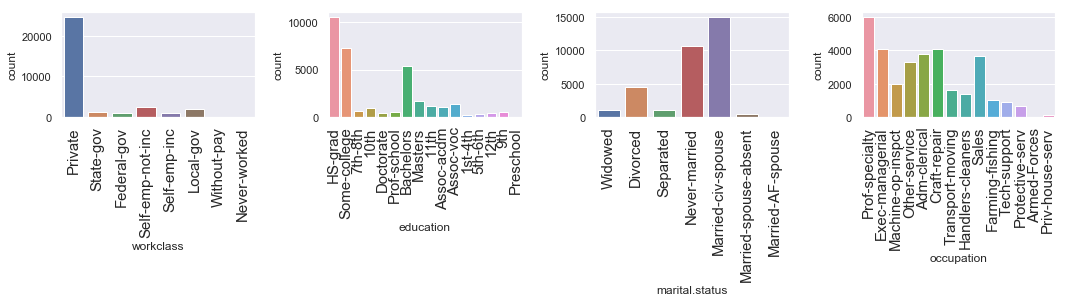

In [143]:
plt.style.use('fivethirtyeight')
sns.set(rc={"figure.figsize":(15,6)})
colmns1=['workclass','education','marital.status','occupation']
         
for i in range(0,len(colmns1)):
         plt.subplot(2,4,i+1)
         sns.countplot(x=data[colmns1[i]])
         plt.xticks(size=15, rotation=90)
         plt.tight_layout()

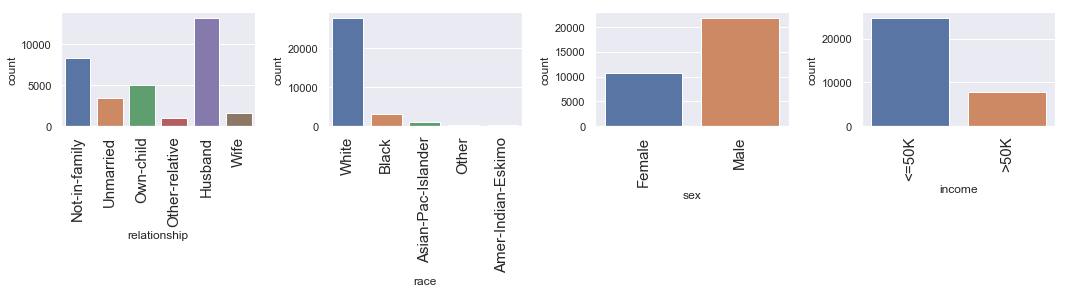

In [21]:
plt.style.use('fivethirtyeight')
sns.set(rc={"figure.figsize":(15,6)})
colmns1=['relationship','race','sex','income']
         
for i in range(0,len(colmns1)):
         plt.subplot(2,4,i+1)
         sns.countplot(x=data[colmns1[i]])
         plt.xticks(size=15, rotation=90)
         plt.tight_layout()

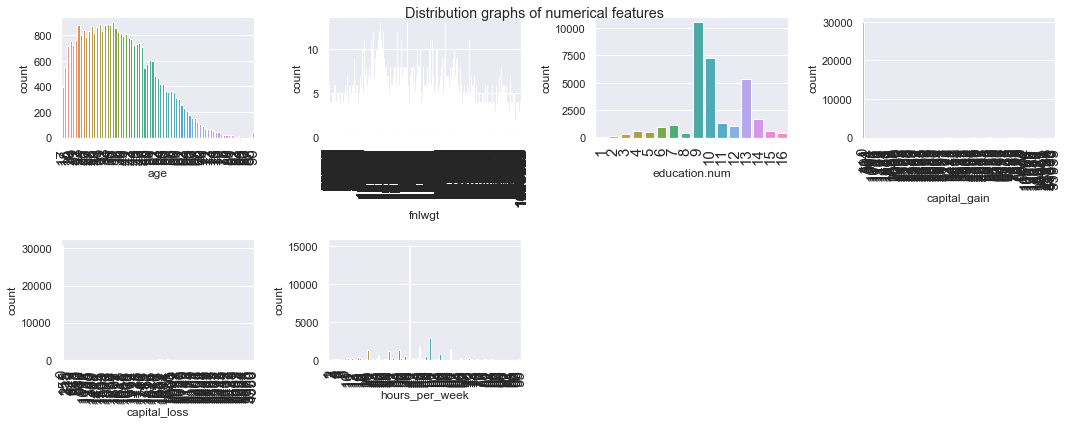

In [22]:
 plt.suptitle("Distribution graphs of numerical features")
for i in range(0,len(num_features)):
         plt.subplot(2,4,i+1)
         sns.countplot(x=data[num_features[i]])
         plt.xticks(size=15, rotation=90)
         plt.tight_layout()

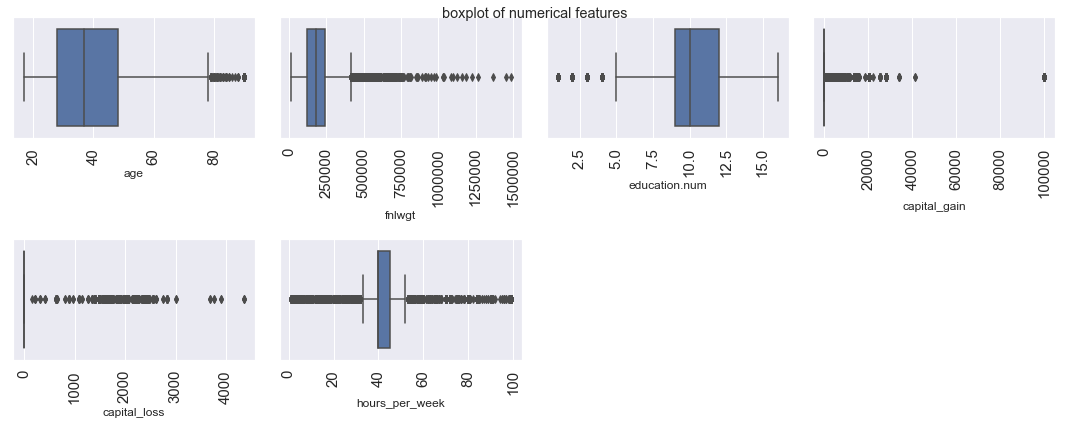

In [23]:
 plt.suptitle("boxplot of numerical features")
for i in range(0,len(num_features)):
         plt.subplot(2,4,i+1)
         sns.boxplot(x=data[num_features[i]])
         plt.xticks(size=15, rotation=90)
         plt.tight_layout()

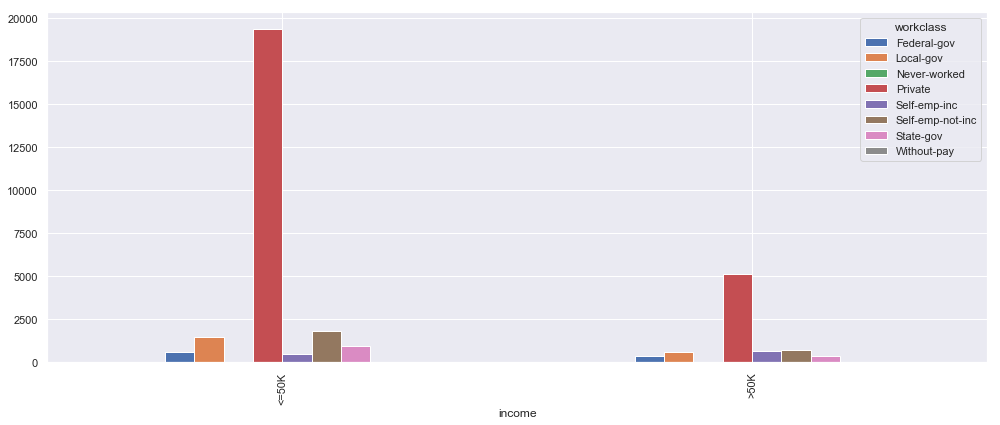

In [144]:
salary=pd.crosstab(data['income'],data['workclass'])
salary.plot(kind='bar')

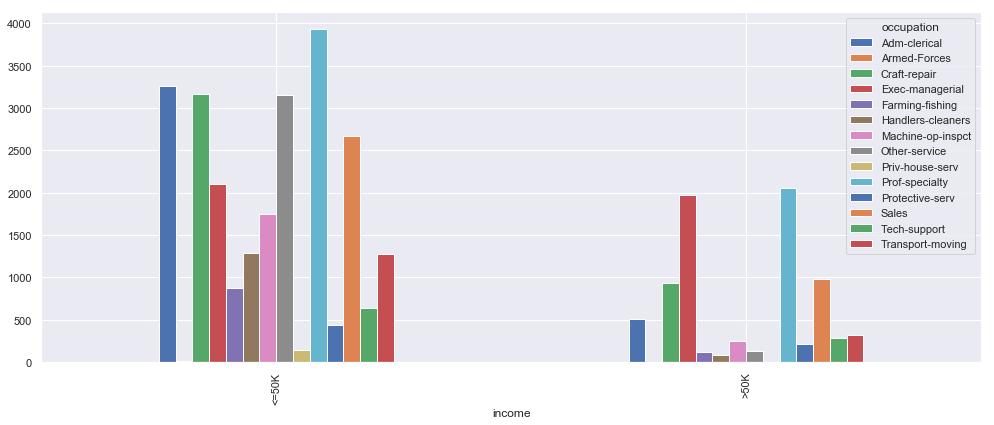

In [145]:
occupation=pd.crosstab(data['income'],data['occupation'])
occupation.plot(kind='bar')

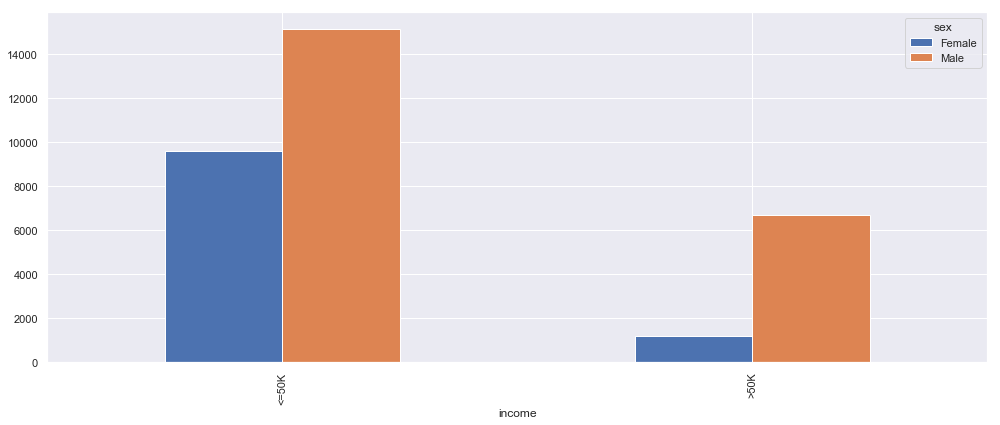

In [146]:
sex=pd.crosstab(data['income'],data['sex'])
sex.plot(kind='bar')

In [20]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [21]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for feature in cat_features:
    le.fit(data[feature])
    data[feature]=le.transform(data[feature])

In [22]:
for i in cat_features :
    print(i,data[i].unique())
    
    print()
    print("-----------------------------------------------------------")
    print()

workclass [3 6 0 5 4 1 7 2]

-----------------------------------------------------------

education [11 15  5  0 10 14  9 12  1  7  8  3  4  2  6 13]

-----------------------------------------------------------

marital.status [6 0 5 4 2 3 1]

-----------------------------------------------------------

occupation [ 9  3  6  7  0  2 13  5 11  4 12 10  1  8]

-----------------------------------------------------------

relationship [1 4 3 2 0 5]

-----------------------------------------------------------

race [4 2 1 3 0]

-----------------------------------------------------------

sex [0 1]

-----------------------------------------------------------

native_country [38 25 11 39  2 35 18 29 37  1 34 14 32 30 19  8 10 21 23 16 15  4 20  0
 28 26  5 13  7 17  3 12 22  6  9 40 33 31 24 36 27]

-----------------------------------------------------------

income [0 1]

-----------------------------------------------------------



In [23]:
# or #data['income']= data['income'].map({'<=50K': 0,'>50K': 1})#.astype(int)

In [24]:
data.tail()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
32556,22,3,310152,15,10,4,10,1,4,1,0,0,40,38,0
32557,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32558,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32559,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
32560,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


<AxesSubplot:>

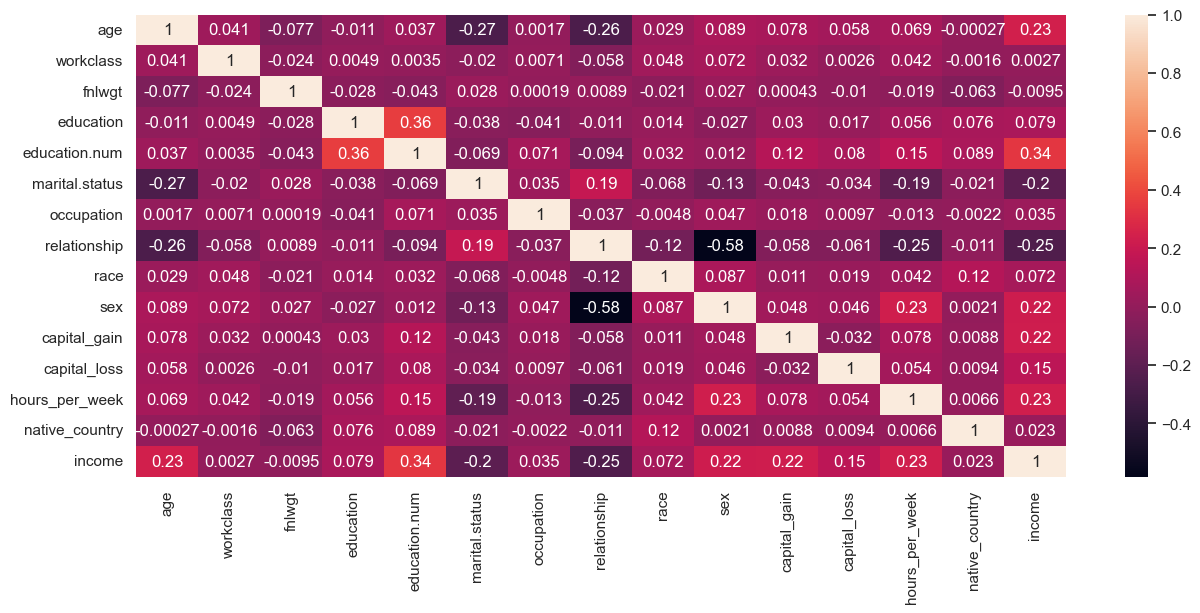

In [26]:
sns.heatmap(data.corr(),annot=True)

In [25]:
data["income"].value_counts()

0    24720
1     7841
Name: income, dtype: int64

In [26]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [27]:
data.drop(["education","fnlwgt","native_country"],axis=1,inplace=True)

In [28]:
data.head()

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income
0,90,3,9,6,9,1,4,0,0,4356,40,0
1,82,3,9,6,3,1,4,0,0,4356,18,0
2,66,3,10,6,9,4,2,0,0,4356,40,0
3,54,3,4,0,6,4,4,0,0,3900,40,0
4,41,3,10,5,9,3,4,0,0,3900,40,0


In [31]:
data.to_csv("cleandata.csv",index=False)

Model Training

In [29]:
data.shape

(32561, 12)

In [30]:
x=data.drop("income",axis=1)
y=data["income"]

In [34]:
catg_features=x.select_dtypes(include="object").columns
numr_features=x.select_dtypes(exclude="object").columns
print("catg_features")
print("_________ ")
print("numr_features")
numr_features

catg_features
_________ 
numr_features


Index(['age', 'workclass', 'education.num', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'capital_gain', 'capital_loss',
       'hours_per_week'],
      dtype='object')

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

#pipelie
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [36]:
num_pipline=Pipeline(
        steps=[("imputer",SimpleImputer(strategy="median")),
                ("scaler",StandardScaler())])

cat_pipline= Pipeline(
        steps=[("imputer",SimpleImputer(strategy="most_frequent")),
                ("scaler",StandardScaler())])

preprocessor= ColumnTransformer([
    ("num_piline",num_pipline,numr_features)
])

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)

In [38]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(26048, 11)
(6513, 11)
(26048,)
(6513,)


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report#,ConfusionMatrixDisplay



In [40]:
def performance_metrices(test,predict):
    confmatrix=print(f"Confusion Matrix:{confusion_matrix(test,predict)}")
    precison=print(f"Precision_Score Matrix:{precision_score(test,predict)}")
    recall=print(f"RECALL_SCORE:{recall_score(test,predict)}")
    f1score=print(f"F1_SCORE:{f1_score(test,predict)}")
    accuracyscore=print(f"ACCURACY_SCORE:{acuuracy_score(test,predict)}")
    return confusionmatrix,precision,recall,f1score,accuracyscore 

## HyperParameter Tuning

In [41]:
lr=LogisticRegression()

In [42]:
pram={ "class_weight":['balanced'],
       'penalty':['l1','l2'],
       'C':[0.001,0.01,0.1,1,10,100],
        'solver':['liblinear','saga']
     }

In [43]:
grid=GridSearchCV(estimator=lr,param_grid=pram,cv=5,n_jobs=1,verbose=3 )

In [44]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END C=0.001, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.695 total time=   0.0s
[CV 2/5] END C=0.001, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.681 total time=   0.0s
[CV 3/5] END C=0.001, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.700 total time=   0.0s
[CV 4/5] END C=0.001, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.689 total time=   0.0s
[CV 5/5] END C=0.001, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.699 total time=   0.0s
[CV 1/5] END C=0.001, class_weight=balanced, penalty=l1, solver=saga;, score=0.784 total time=   0.4s
[CV 2/5] END C=0.001, class_weight=balanced, penalty=l1, solver=saga;, score=0.776 total time=   0.4s
[CV 3/5] END C=0.001, class_weight=balanced, penalty=l1, solver=saga;, score=0.784 total time=   0.4s
[CV 4/5] END C=0.001, class_weight=balanced, penalty=l1, solver=saga;, score=0.771 total time=   

[CV 2/5] END C=10, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.769 total time=   0.0s
[CV 3/5] END C=10, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.777 total time=   0.1s
[CV 4/5] END C=10, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.763 total time=   0.0s
[CV 5/5] END C=10, class_weight=balanced, penalty=l1, solver=liblinear;, score=0.773 total time=   0.0s
[CV 1/5] END C=10, class_weight=balanced, penalty=l1, solver=saga;, score=0.784 total time=   0.4s
[CV 2/5] END C=10, class_weight=balanced, penalty=l1, solver=saga;, score=0.776 total time=   0.4s
[CV 3/5] END C=10, class_weight=balanced, penalty=l1, solver=saga;, score=0.784 total time=   0.4s
[CV 4/5] END C=10, class_weight=balanced, penalty=l1, solver=saga;, score=0.771 total time=   0.4s
[CV 5/5] END C=10, class_weight=balanced, penalty=l1, solver=saga;, score=0.786 total time=   0.4s
[CV 1/5] END C=10, class_weight=balanced, penalty=l2, solver=liblinear;, score=0.746 tota

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced'], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             verbose=3)

In [45]:
grid.best_params_

{'C': 0.001, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'saga'}

In [47]:
 grid.score(X_train,y_train)

0.7801750614250614

In [48]:
y_prad=grid.predict(X_test)

In [49]:
accuracy_score(y_test,y_prad)

0.7787501919238446

In [50]:
dr=DecisionTreeClassifier()

In [51]:
param_grid={
    "class_weight":["balanced"],
    "criterion":['gini',"entropy","log_loss"],
    "splitter":['best','random'],
    "max_depth":[3,4,5,6],
    "min_samples_split":[2,3,4,5],
    "min_samples_leaf":[1,2,3],
    "max_features":["auto","sqrt","log2"]
}

In [52]:
grid_search=GridSearchCV(estimator=dr,param_grid=param_grid,cv=5,scoring="accuracy")

In [53]:
import sklearn
print(sklearn.__version__)

1.0.2


In [54]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5, 6],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4, 5],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [55]:
grid_search.best_params_

{'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 6,
 'max_features': 'sqrt',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'splitter': 'best'}

In [56]:
grid_search.score(X_train,y_train)

0.7700015356265356

In [57]:
y_prad=grid_search.predict(X_test)

In [58]:
accuracy_score(y_test,y_prad)

0.7638569015814525

In [59]:
print(classification_report(y_test,y_prad))

              precision    recall  f1-score   support

           0       0.95      0.73      0.83      4976
           1       0.50      0.87      0.64      1537

    accuracy                           0.76      6513
   macro avg       0.72      0.80      0.73      6513
weighted avg       0.84      0.76      0.78      6513



In [60]:
rf=RandomForestClassifier()

In [61]:
param_grid={
            'class_weight': ['balanced'],
            'n_estimators':[20,50,30],
            'max_depth':[3,4,5,6],
            'min_samples_split':[2,5,10]
}

In [62]:
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,scoring="accuracy")

In [63]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'class_weight': ['balanced'],
                         'max_depth': [3, 4, 5, 6],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [20, 50, 30]},
             scoring='accuracy')

In [64]:
grid_search.best_params_

{'class_weight': 'balanced',
 'max_depth': 6,
 'min_samples_split': 10,
 'n_estimators': 50}

In [65]:
grid_search.score(X_train,y_train)

0.7905789312039312

In [66]:
y_prad=grid_search.predict(X_test)

In [67]:
accuracy_score(y_test,y_prad)

0.7839705204974666

In [68]:
print(classification_report(y_test,y_prad))

              precision    recall  f1-score   support

           0       0.95      0.76      0.84      4976
           1       0.53      0.87      0.66      1537

    accuracy                           0.78      6513
   macro avg       0.74      0.81      0.75      6513
weighted avg       0.85      0.78      0.80      6513

